# Exploration des métadonnées

## Importation et formatage des données

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importation des métadonnées 
data_folder = "../../data"
conditions = ["Viral Pneumonia", "Lung_Opacity", "COVID",  "Normal"]

covid_meta = pd.read_excel(os.path.join(data_folder,"COVID.metadata.xlsx"))
lung_opa_meta = pd.read_excel(os.path.join(data_folder,"Lung_Opacity.metadata.xlsx"))
pneumonia_meta = pd.read_excel(os.path.join(data_folder,"Viral Pneumonia.metadata.xlsx"))
normal_meta = pd.read_excel(os.path.join(data_folder,"Normal.metadata.xlsx"))

data_meta = pd.concat([covid_meta, lung_opa_meta, pneumonia_meta, normal_meta])

In [3]:
print(data_meta.shape)
print(data_meta.info())
data_meta.head(10)

(21165, 4)
<class 'pandas.core.frame.DataFrame'>
Index: 21165 entries, 0 to 10191
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FILE NAME  21165 non-null  object
 1   FORMAT     21165 non-null  object
 2   SIZE       21165 non-null  object
 3   URL        21165 non-null  object
dtypes: object(4)
memory usage: 826.8+ KB
None


,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
5,COVID-6,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
6,COVID-7,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
7,COVID-8,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
8,COVID-9,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
9,COVID-10,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [4]:
# Rennomage des variables
new_names = {'FILE NAME' : 'file_name',
            'FORMAT' : 'format',
             'SIZE' : 'resolution',
             'URL' : 'url'
}
data_meta.rename(columns=new_names, inplace=True)

In [5]:
# Création d'une variable de label
data_meta['data_type'] = data_meta.file_name.str.split('-').str[0]

data_meta['data_type'].replace({"Lung_Opacity" : "Lung Opacity",
                                "COVID" : "Covid",
                                "NORMAL" : "Normal"}, inplace=True)
print(data_meta.head())
data_meta.info()

  file_name format resolution  \
0   COVID-1    PNG    256*256   
1   COVID-2    PNG    256*256   
2   COVID-3    PNG    256*256   
3   COVID-4    PNG    256*256   
4   COVID-5    PNG    256*256   

                                                 url data_type  
0  https://sirm.org/category/senza-categoria/covi...     Covid  
1  https://sirm.org/category/senza-categoria/covi...     Covid  
2  https://sirm.org/category/senza-categoria/covi...     Covid  
3  https://sirm.org/category/senza-categoria/covi...     Covid  
4  https://sirm.org/category/senza-categoria/covi...     Covid  
<class 'pandas.core.frame.DataFrame'>
Index: 21165 entries, 0 to 10191
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   file_name   21165 non-null  object
 1   format      21165 non-null  object
 2   resolution  21165 non-null  object
 3   url         21165 non-null  object
 4   data_type   21165 non-null  object
dtypes: object(5)
memory usa

C:\Users\Emilie\AppData\Local\Temp\ipykernel_15184\3117571849.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_meta['data_type'].replace({"Lung_Opacity" : "Lung Opacity",


## Répartition des données par type de malades

data_type
Normal             10192
Lung Opacity        6012
Covid               3616
Viral Pneumonia     1345
Name: count, dtype: int64


data_type
Normal             0.481550
Lung Opacity       0.284054
Covid              0.170848
Viral Pneumonia    0.063548
Name: proportion, dtype: float64

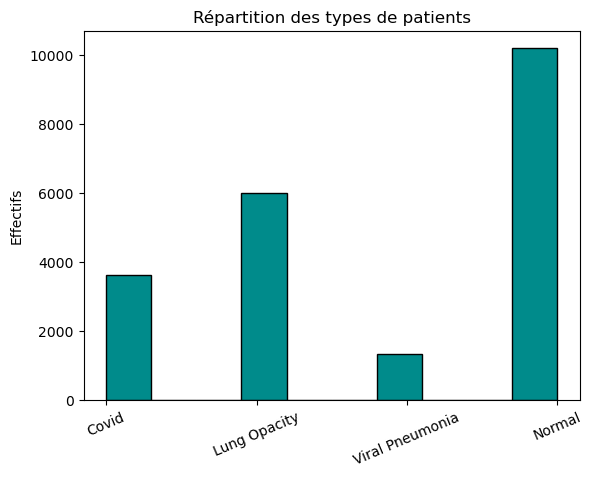

In [6]:
plt.hist(data_meta.data_type, rwidth=1, color = "darkcyan", ec="black")
plt.xticks(rotation=23)
plt.ylabel('Effectifs')
plt.title('Répartition des types de patients');

print(data_meta.data_type.value_counts())
data_meta.data_type.value_counts(normalize=True)

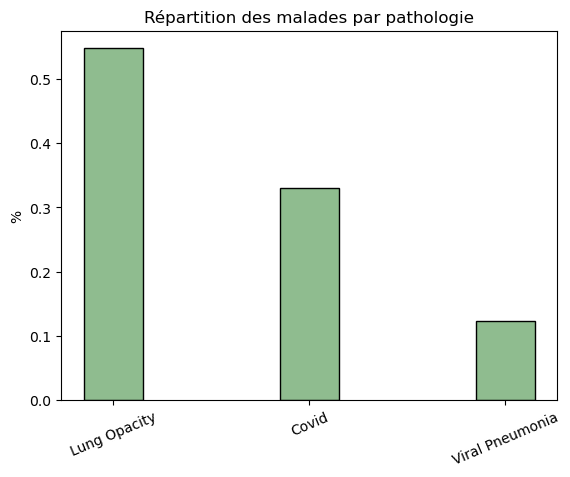

In [7]:
sick_count = data_meta.loc[data_meta.data_type!="Normal"].data_type.value_counts(normalize=True)

plt.bar(x=sick_count.index, height=sick_count.values, color = "darkseagreen", ec="black", width=0.3)
plt.xticks(rotation=23)
plt.ylabel('%')
plt.title('Répartition des malades par pathologie');


# Répartition des sources

In [8]:
# Nombre de sources différentes
print("Nombre de sources ", len(data_meta.url.unique()))
data_meta.url.unique()

Nombre de sources  8


array(['https://sirm.org/category/senza-categoria/covid-19/',
       'https://github.com/ml-workgroup/covid-19-image-repository/tree/master/png',
       'https://eurorad.org', 'https://github.com/armiro/COVID-CXNet',
       'https://github.com/ieee8023/covid-chestxray-dataset',
       'https://bimcv.cipf.es/bimcv-projects/bimcv-covid19/#1590858128006-9e640421-6711',
       'https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data',
       'https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia'],
      dtype=object)

url
https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data                   14863
https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia                       2686
https://bimcv.cipf.es/bimcv-projects/bimcv-covid19/#1590858128006-9e640421-6711     2474
https://github.com/armiro/COVID-CXNet                                                400
https://eurorad.org                                                                  258
https://github.com/ml-workgroup/covid-19-image-repository/tree/master/png            183
https://github.com/ieee8023/covid-chestxray-dataset                                  182
https://sirm.org/category/senza-categoria/covid-19/                                  119
Name: count, dtype: int64


C:\Users\Emilie\AppData\Local\Temp\ipykernel_15184\1638185418.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(["kaggle/rnsa", "kaggle/xray-pneum", "bimcv/covid19", "github/covid-cxnet", "eurorad.org",


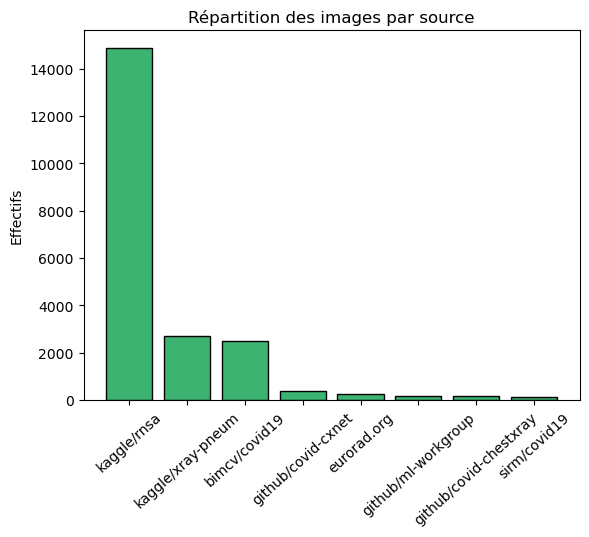

In [9]:
url_counts = data_meta.url.value_counts()

print(url_counts)
url1 = url_counts.index[1]
url1.split('/')[2].split('.')[1]

url1.replace("https://", "")

url_list =  url_counts.index.str.replace("https://", "")

url_list

fig=plt.figure()
ax1 = fig.add_subplot(111)
ax1.bar(x=url_counts.index, height=url_counts.values, color = "mediumseagreen", ec="black")
ax1.set_xticklabels(["kaggle/rnsa", "kaggle/xray-pneum", "bimcv/covid19", "github/covid-cxnet", "eurorad.org", 
             "github/ml-workgroup", "github/covid-chestxray", "sirm/covid19"], rotation=42)
ax1.set_ylabel('Effectifs')
ax1.set_title('Répartition des images par source');

In [10]:
pd.crosstab(data_meta.url, data_meta.data_type)

data_type,Covid,Lung Opacity,Normal,Viral Pneumonia
url,,,,
https://bimcv.cipf.es/bimcv-projects/bimcv-covid19/#1590858128006-9e640421-6711,2474,0,0,0
https://eurorad.org,258,0,0,0
https://github.com/armiro/COVID-CXNet,400,0,0,0
https://github.com/ieee8023/covid-chestxray-dataset,182,0,0,0
https://github.com/ml-workgroup/covid-19-image-repository/tree/master/png,183,0,0,0
https://sirm.org/category/senza-categoria/covid-19/,119,0,0,0
https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data,0,6012,8851,0
https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia,0,0,1341,1345


c:\Users\Emilie\anaconda3\envs\analyse_pulmonaire\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


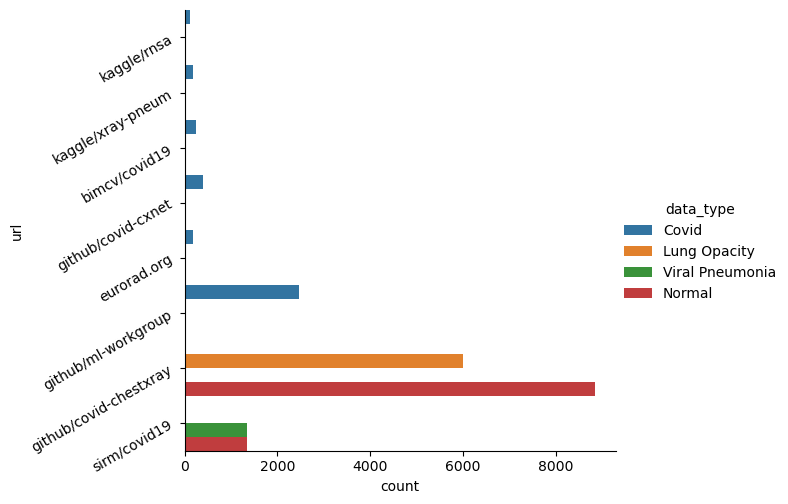

In [11]:

# sns.countplot(y='url', hue='data_type', data=data_meta);
bplot = sns.catplot(y='url', hue='data_type', data=data_meta, kind='count', width=1);
bplot.set_yticklabels(["kaggle/rnsa", "kaggle/xray-pneum", "bimcv/covid19", "github/covid-cxnet", "eurorad.org", 
              "github/ml-workgroup", "github/covid-chestxray", "sirm/covid19"], rotation=30)

In [17]:
data_meta.to_csv(os.path.join("aggregated_metadata.csv"))